In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#speciy which modifications to look for
interesting_mods = ["Glutathione", "Acetyl", "Phospho", "Methyl", "phosphoRibosyl"]

Run ClueGO via Cytoscape and do Go Term Enrichment
- Settings: default (version 2.5.9), Cytoscape 3.9.1
- Enrichment (Right-sided hypergeometric test)
- Network specifity: A bit to the left from medium
- Show only pathways with pV <= 0.05

In [5]:
ontologies = {
    "GO_BiologicalProcess-Custom-GOA-ACAP-ARAP_04.11.2021_00h00": "Biological Process",
    "GO_CellularComponent-Custom-GOA-ACAP-ARAP_04.11.2021_00h00": "Cellular Component",
    "GO_MolecularFunction-Custom-GOA-ACAP-ARAP_04.11.2021_00h00": "Molecular Function",
}

GO_Enrichment_results = {}
for mod in interesting_mods:
    GO_Enrichment_results[mod] = pd.read_csv(f"../data/Fig5C_GO_Enrichment/cluego_output/{mod}_GO.csv", usecols=["Term", "Term PValue", "Ontology Source"])
    GO_Enrichment_results[mod]['-log10(pvalue)'] = -np.log10(GO_Enrichment_results[mod]['Term PValue'])
    GO_Enrichment_results[mod]['Ontology Source'] = GO_Enrichment_results[mod]['Ontology Source'].map(ontologies)


/tmp/ipykernel_1379656/545398335.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1379656/545398335.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1379656/545398335.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1379656/545398335.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_1379656/545398335.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


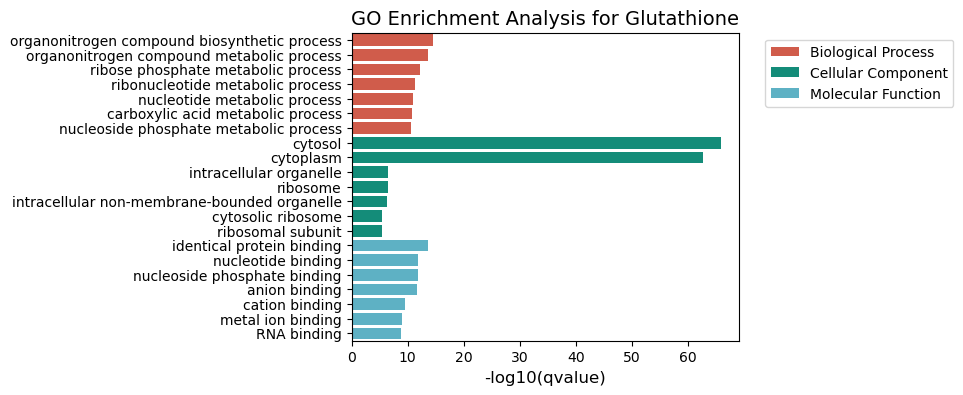

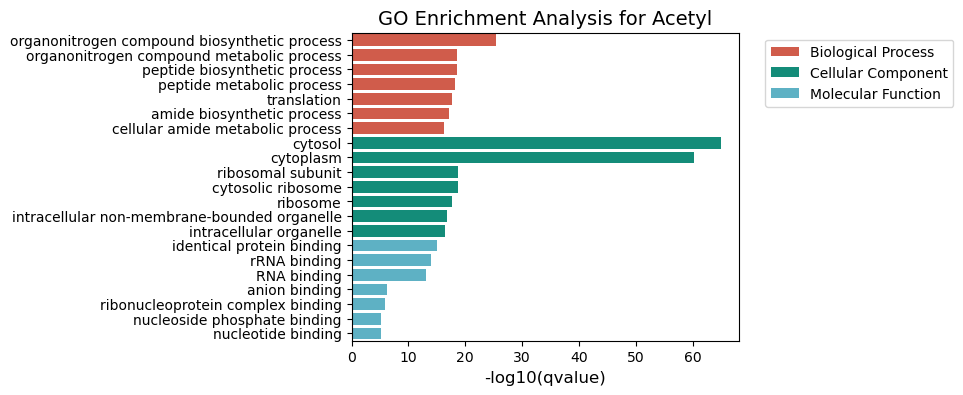

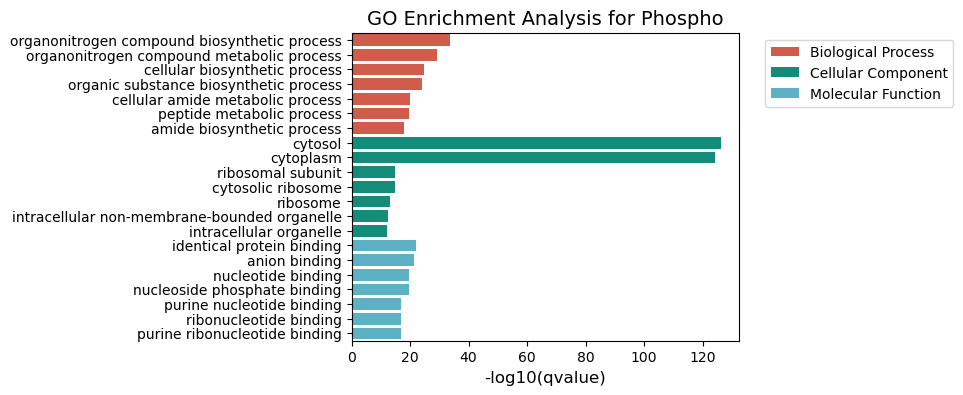

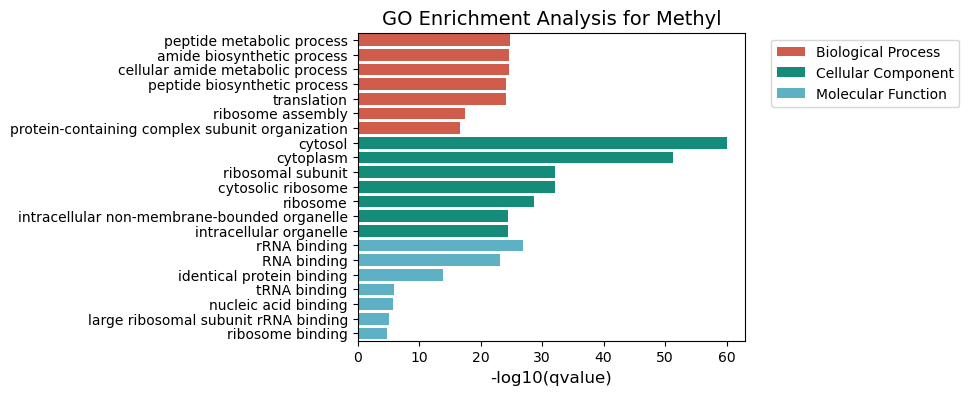

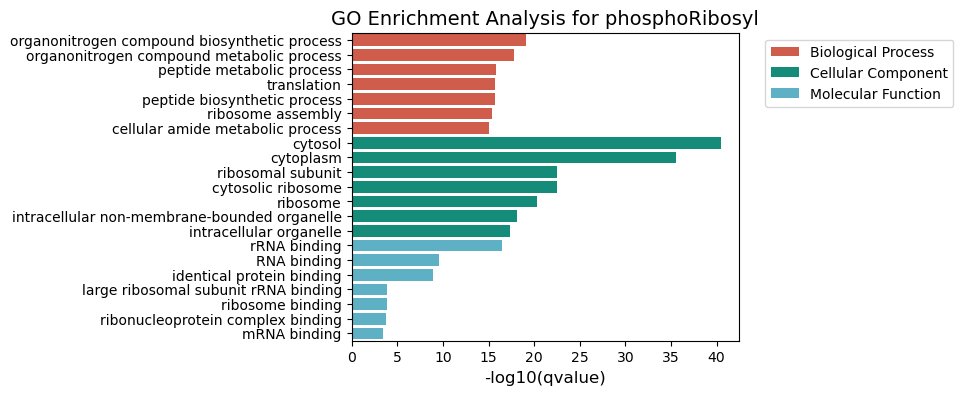

In [10]:
# for each modification, plot the top 10 GO terms
# one plot per ontology source

def plot_GO_terms(GO_df, mod):

    GO_df = GO_df.sort_values(by=['Ontology Source', '-log10(pvalue)'], ascending=[True, False])

    # Sort and keep top 7 terms per ontology
    df_top = (
        GO_df.sort_values(by='-log10(pvalue)', ascending=False)
        .groupby('Ontology Source')
        .head(7)
    )
    df_top = df_top.sort_values(by=['Ontology Source', '-log10(pvalue)'], ascending=[True, False])

    # Set color palette for each ontology
    ontology_colors = {
        'Biological Process': '#E64B35',  # red
        'Cellular Component': '#00A087',  # green
        'Molecular Function': '#4DBBD5'   # blue
    }

    # Start plotting
    plt.figure(figsize=(5, 4))
    sns.barplot(
        data=df_top,
        y='Term',
        x='-log10(pvalue)',
        hue='Ontology Source',
        palette=ontology_colors,
        dodge=False
    )

    # Aesthetic adjustments
    plt.xlabel('-log10(qvalue)', fontsize=12)
    plt.ylabel('')
    plt.title('GO Enrichment Analysis for {}'.format(mod), fontsize=14)
    plt.legend(title='Ontology Source')
    # move legend outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    #plt.legend([],[], frameon=False)
    plt.tight_layout()
    #plt.savefig(f"plots/{mod}_GO_terms.png")

for mod in interesting_mods:
    GO_df = GO_Enrichment_results[mod]
    GO_df = GO_df.sort_values('-log10(pvalue)', ascending=True)
    plot_GO_terms(GO_df, mod)
